### Data Set Description
* `Encounter` ID Unique identifier of an encounter
* `Patient number` Unique identifier of a patient
* `Race Values:` Caucasian, Asian, African American, Hispanic, and other
* `Gender Values:` male, female, and unknown/invalid
* `Age Grouped in 10-year intervals:` 0, 10), 10, 20), …, 90, 100)
* `Weight` Weight in pounds
* `Admission type` Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* `Discharge disposition` Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* `Admission source` Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* `Time in hospital` Integer number of days between admission and discharge
* `Payer code` Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* `Medical specialty` Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* `Number of lab procedures` Number of lab tests performed during the encounter
* `Number of procedures` Numeric Number of procedures (other than lab tests) performed during the encounter
* `Number of medications` Number of distinct generic names administered during the encounter
* `Number of outpatient visits` Number of outpatient visits of the patient in the year preceding the encounter
* `Number of emergency visits` Number of emergency visits of the patient in the year preceding the encounter
* `Number of inpatient visits` Number of inpatient visits of the patient in the year preceding the encounter
* `Diagnosis 1` The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* `Diagnosis 2` Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* `Diagnosis 3` Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* `Number of diagnoses` Number of diagnoses entered to the system 0%
* `Glucose serum test result` Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* `A1c test result` Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* `Change of medications` Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* `Diabetes medications` Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* `24 features for medications For the generic names:` metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* `Readmitted Days to inpatient readmission. Values:` “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [1]:
# Importar librerías base
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importar librerias base de modelos de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#df = pd.read_csv('s3://final-electiva-ii/data/original/diabetic_data.csv')
df = pd.read_csv('/work/diabetic_data.csv')

In [3]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
db = df.copy()
db = db.replace("?",np.nan)
db = db.drop(columns=["encounter_id","patient_nbr",'discharge_disposition_id',
                    'admission_source_id','payer_code', 'medical_specialty',
                    'diag_1', 'diag_2', 'diag_3',"medical_specialty"])

db = db.replace({"No":0,"Down":0, "Steady":1, "Up":1, "Ch":1,"NO":0, "<30":1, ">30":1, "Yes": 1})

db = db.replace({"[0-10)":"0-10","[10-20)":"10-20", "[20-30)":"20-30", "[30-40)":"30-40", "[40-50)":"40-50",
                "[50-60)":"50-60", "[60-70)":"60-70", "[70-80)":"70-80", "[80-90)": "80-90", "[90-100)": "90-100"})

db.head()

,race,gender,age,weight,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,0-10,NaN,6,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,10-20,NaN,1,3,59,0,18,0,...,0,1,0,0,0,0,0,1,1,1
2,AfricanAmerican,Female,20-30,NaN,1,2,11,5,13,2,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,30-40,NaN,1,2,44,1,16,0,...,0,1,0,0,0,0,0,1,1,0
4,Caucasian,Male,40-50,NaN,1,1,51,0,8,0,...,0,1,0,0,0,0,0,1,1,0


Text(0.5, 1.0, 'Análisis de balance de los datos target')

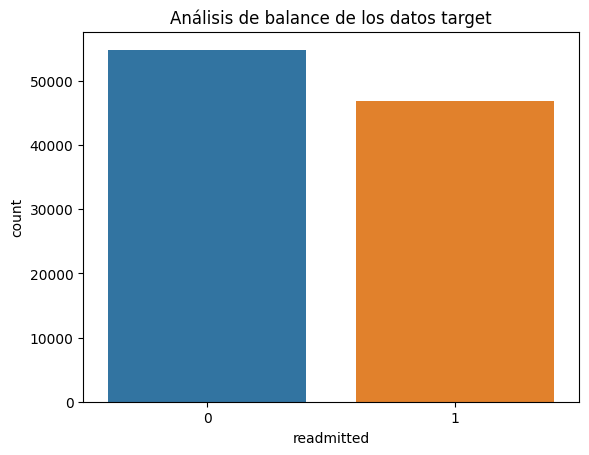

In [6]:
sns.countplot(x = "readmitted", data = db)
plt.title("Análisis de balance de los datos target")

### Selección de datos con mayór relación

<AxesSubplot: >

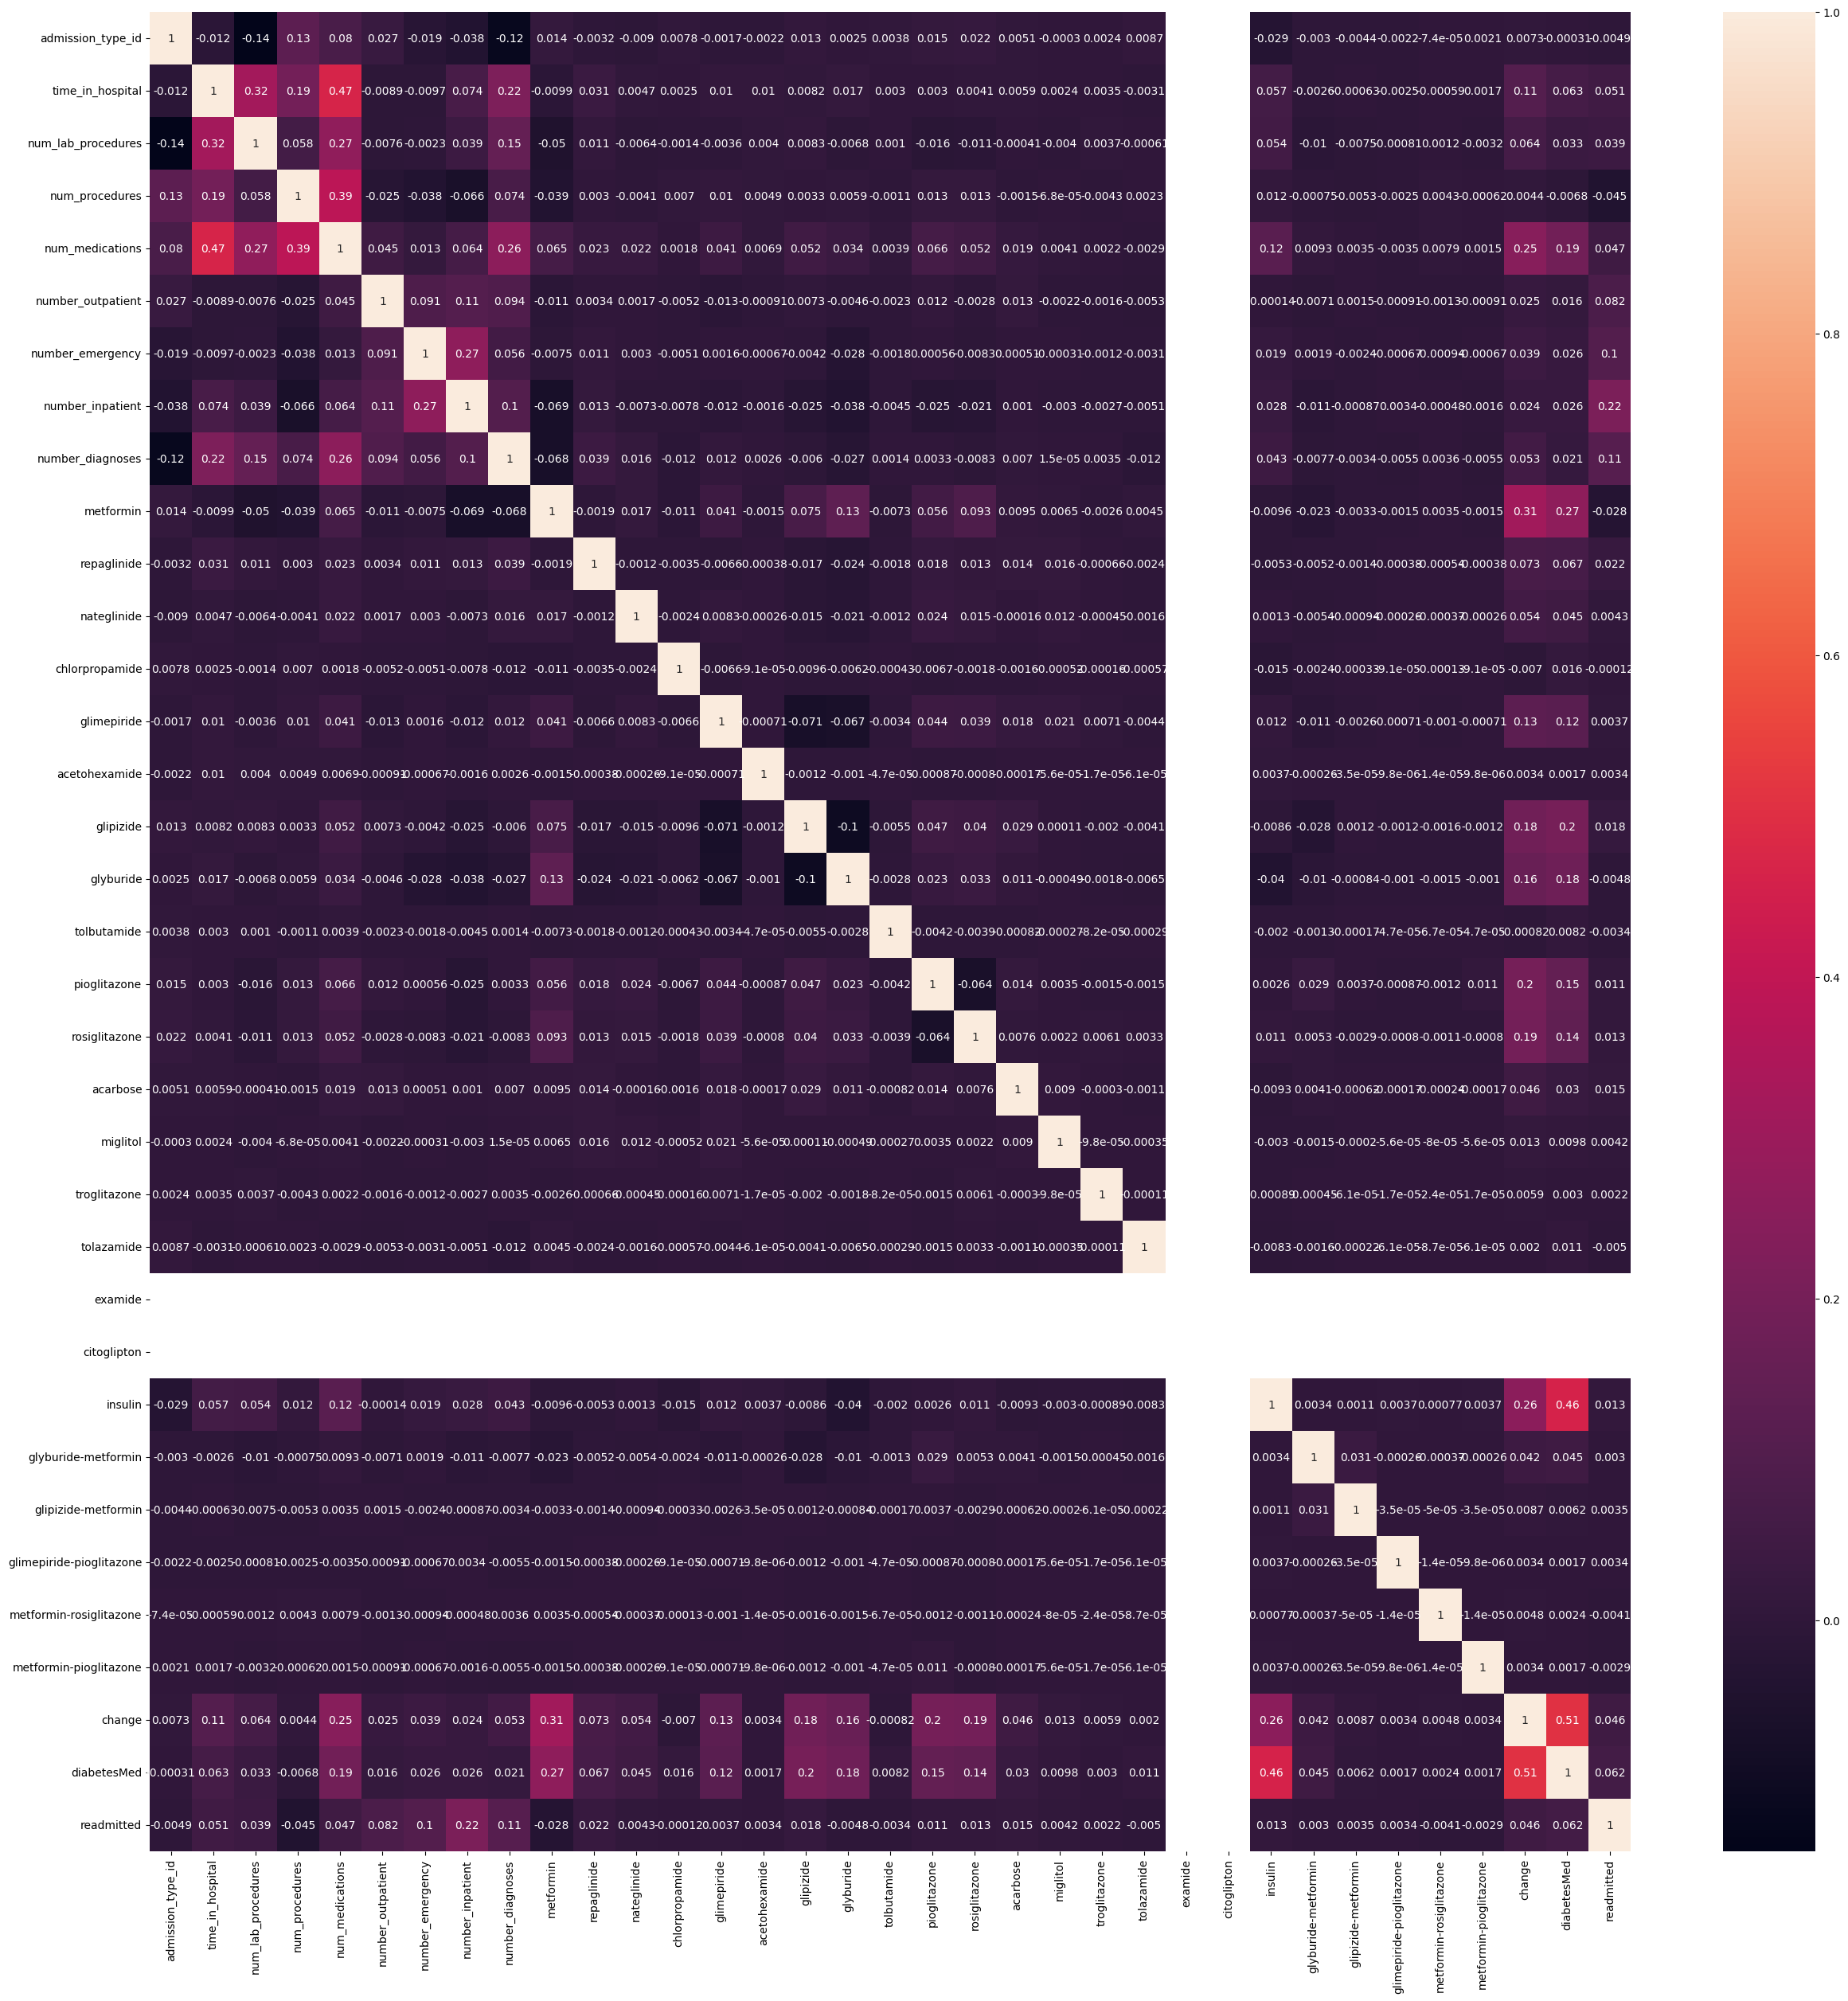

In [7]:
corr = db.corr() 
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

In [8]:
db = db.drop(columns=["examide", "citoglipton",'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','acarbose', 
                    'miglitol', 'troglitazone', 'tolazamide', 'tolbutamide','acetohexamide','chlorpropamide',
                    'repaglinide', 'nateglinide'])


<AxesSubplot: >

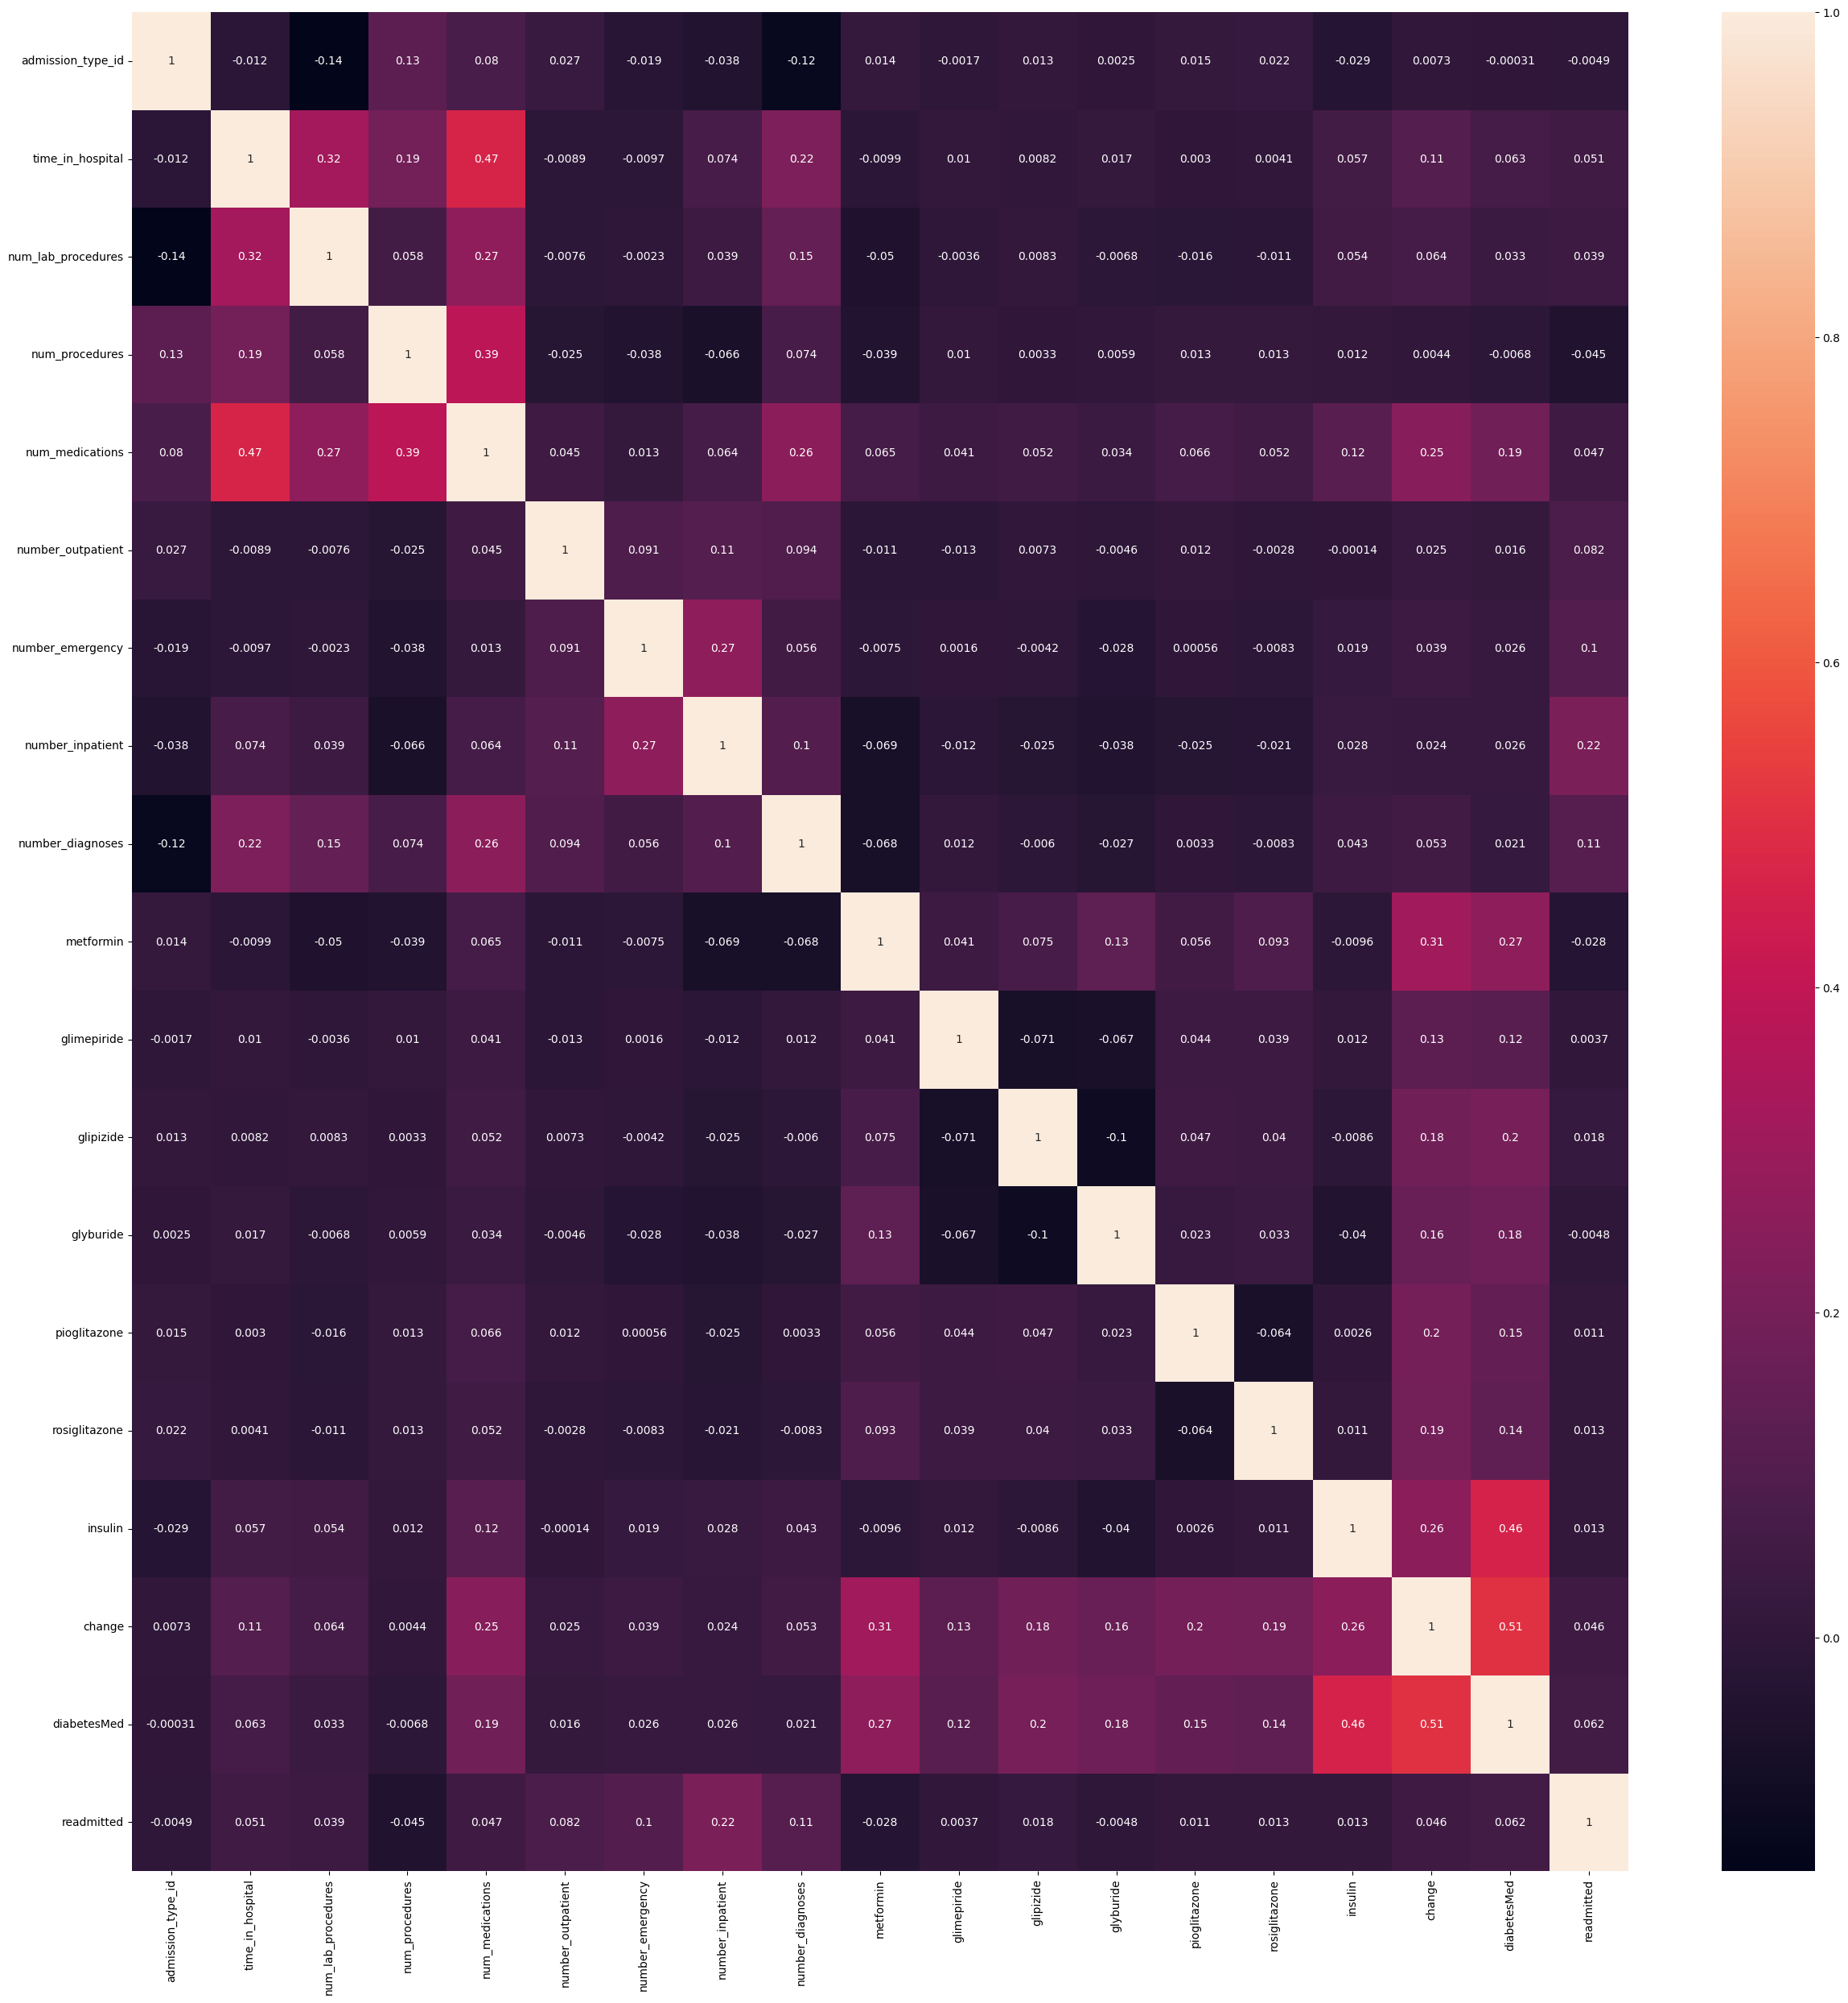

In [9]:
corr = db.corr() 
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

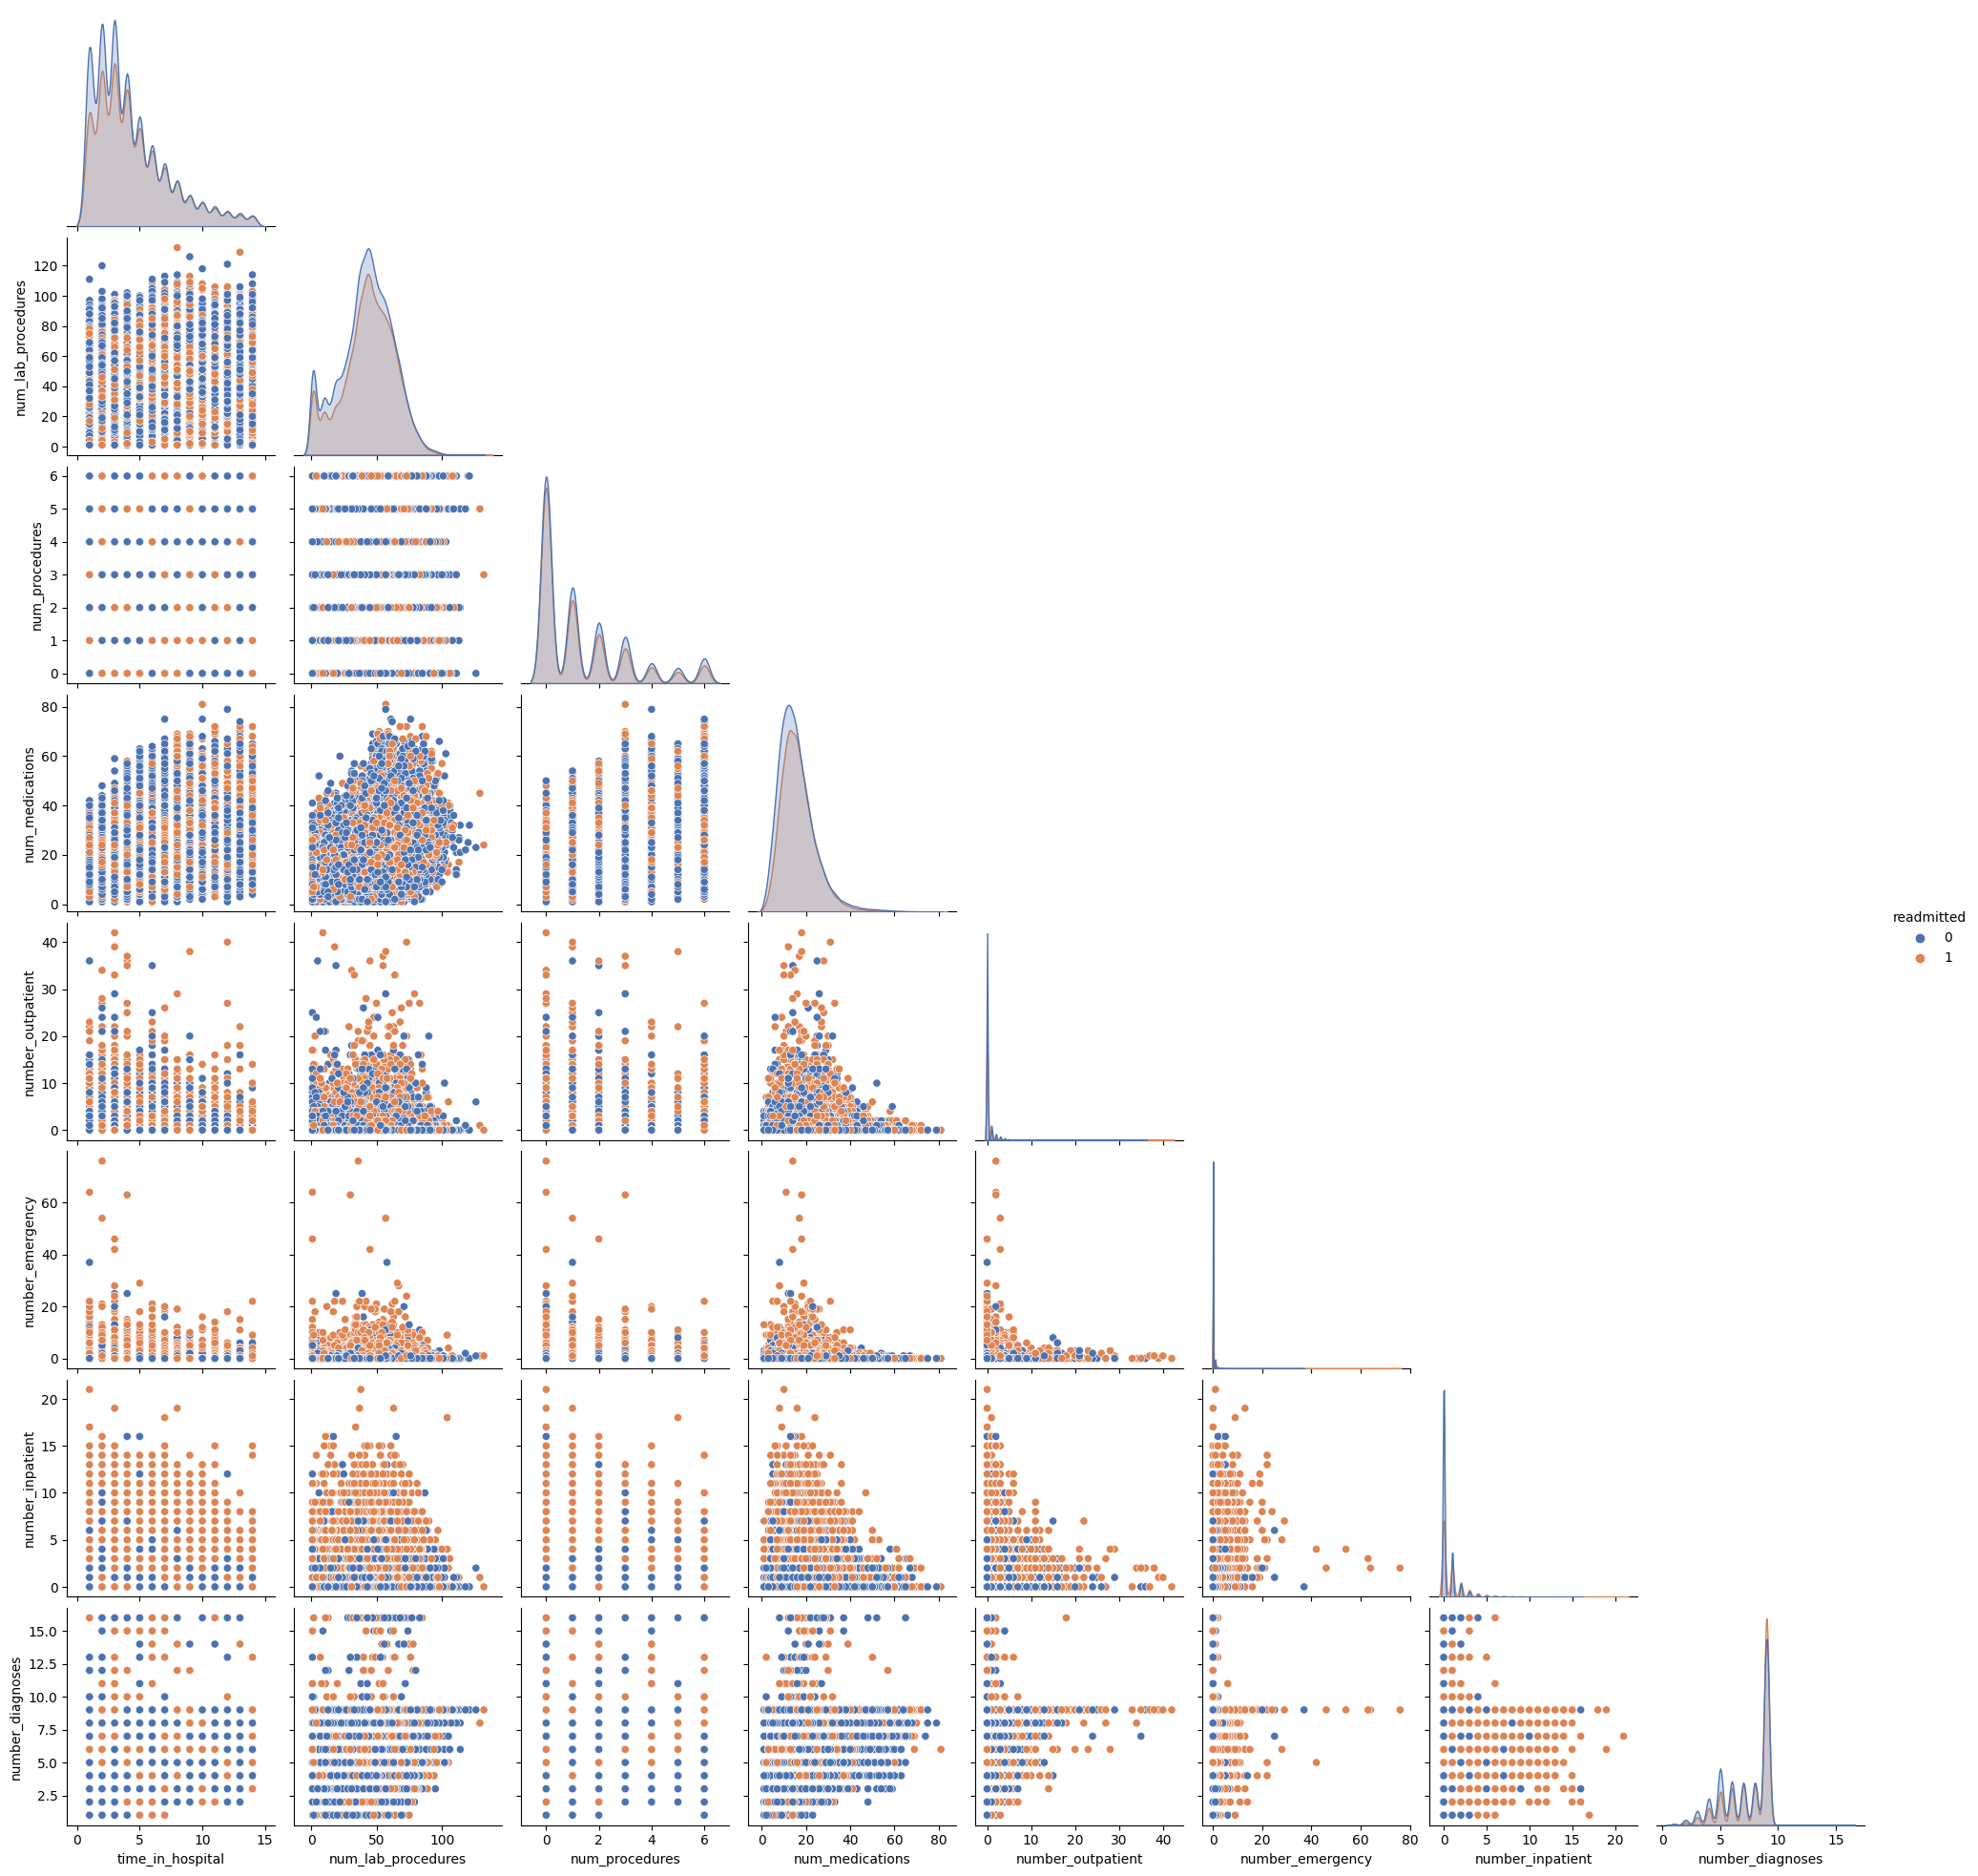

In [10]:
sns.pairplot(db[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses','readmitted']],hue='readmitted', palette='deep', corner=True)

In [11]:
train, test = train_test_split(db, test_size=0.3, 
                               random_state=42,
                              stratify=db['readmitted'])

In [12]:
#train.to_csv("s3://final-electiva-ii/data/train/train.csv", index=False)
#test.to_csv("s3://final-electiva-ii/data/test/test.csv", index=False)
train.to_csv('/work/diabetic_train.csv', index=False)
test.to_csv('/work/diabetic_test.csv', index=False)

In [13]:
features = [['race', 'gender', 'age', 'weight',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed']]

In [14]:
#Train
train = train.dropna()
X_train = train.drop( ['readmitted',], axis=1)
X_train = train[features[0]]
y_train = train['readmitted']
X_train = X_train.dropna()

In [15]:
#Test
test = test.dropna()
X_test = test.drop( ['readmitted',], axis=1)
X_test = test[features[0]]
y_test = test['readmitted']
X_test = X_test.dropna()

## 4.3.0 Evaluación de caracteristicas

In [16]:
X_train = pd.get_dummies(X_train)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
X_test = pd.get_dummies(X_test)

In [18]:
f_importances = model.feature_importances_
f_importances

array([0.11941933, 0.1598569 , 0.05881564, 0.1164933 , 0.05102741,
       0.02561617, 0.05408555, 0.06079369, 0.01195325, 0.00510602,
       0.01137472, 0.01139698, 0.00989791, 0.00620239, 0.01354615,
       0.02114369, 0.0116449 , 0.00413823, 0.        , 0.00380515,
       0.00523624, 0.00921657, 0.01606374, 0.        , 0.001793  ,
       0.00233275, 0.004731  , 0.01212683, 0.020338  , 0.01635963,
       0.01808233, 0.01308659, 0.01047254, 0.        , 0.00654268,
       0.01297568, 0.01024879, 0.00730892, 0.        , 0.00726557,
       0.02030598, 0.01734653, 0.        , 0.00624186, 0.00358462,
       0.01151056, 0.01051218])

In [19]:
columns_train = X_train.columns

In [20]:
list_features = list(zip(columns_train, f_importances))
list_features

[('time_in_hospital', 0.11941933425724244),
 ('num_lab_procedures', 0.15985689631419675),
 ('num_procedures', 0.05881564116704192),
 ('num_medications', 0.11649330338807028),
 ('number_outpatient', 0.05102740509774104),
 ('number_emergency', 0.025616173430866723),
 ('number_inpatient', 0.054085550623036736),
 ('number_diagnoses', 0.06079369362640195),
 ('metformin', 0.01195325474659767),
 ('glimepiride', 0.005106015011026693),
 ('glipizide', 0.011374720019947377),
 ('glyburide', 0.011396984546002853),
 ('pioglitazone', 0.009897906269953865),
 ('rosiglitazone', 0.006202389355604952),
 ('insulin', 0.013546153614714227),
 ('change', 0.02114369491549806),
 ('diabetesMed', 0.011644904153761827),
 ('race_AfricanAmerican', 0.004138226020280195),
 ('race_Asian', 0.0),
 ('race_Caucasian', 0.0038051525014241878),
 ('race_Other', 0.0052362443080768385),
 ('gender_Female', 0.009216570922232416),
 ('gender_Male', 0.016063736499001995),
 ('age_0-10', 0.0),
 ('age_10-20', 0.0017930029996098946),
 ('a

<AxesSubplot: >

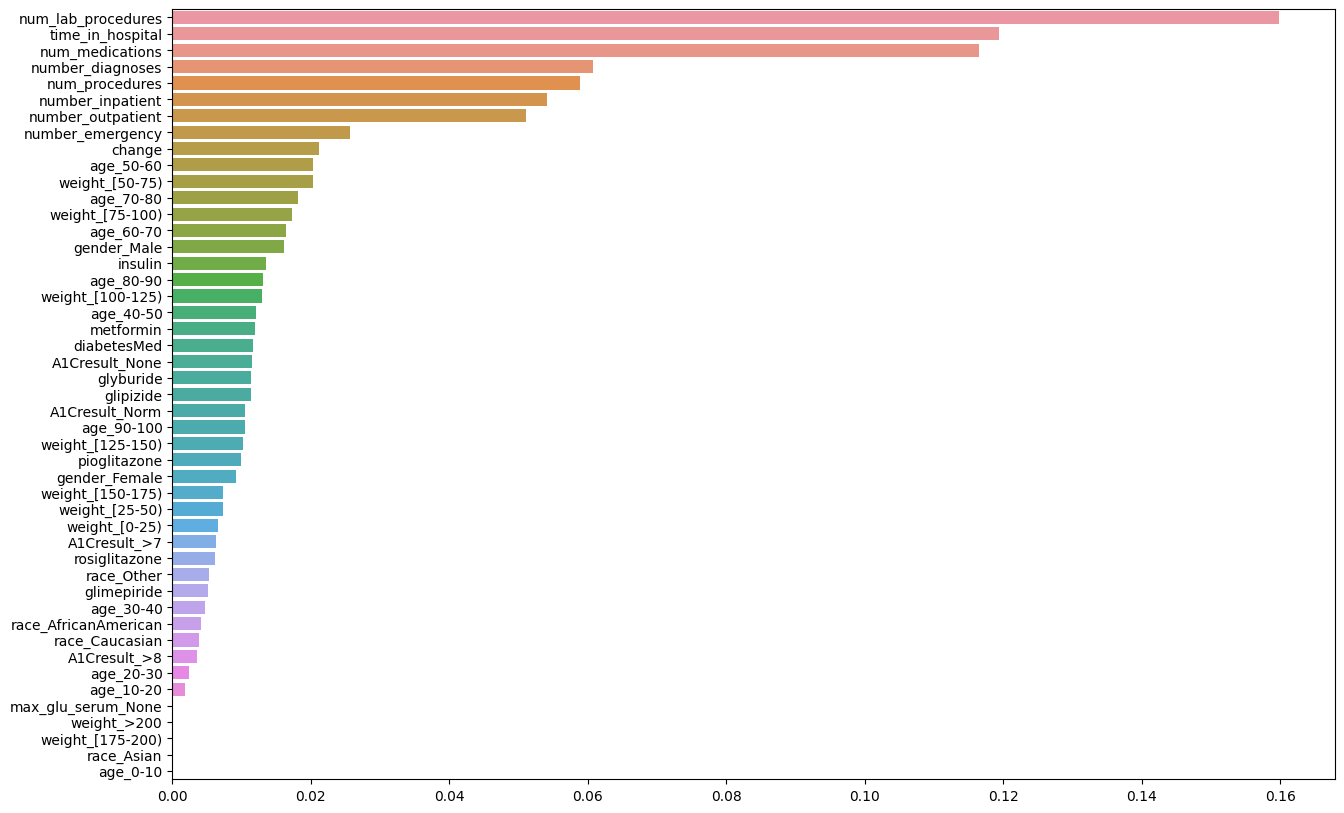

In [21]:
order_columns = X_train.columns[np.argsort(f_importances)[::-1]]
order_importance = np.sort(f_importances)[::-1]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=order_importance, y=order_columns)

### 5.1.0 Decision Tree Classifier

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

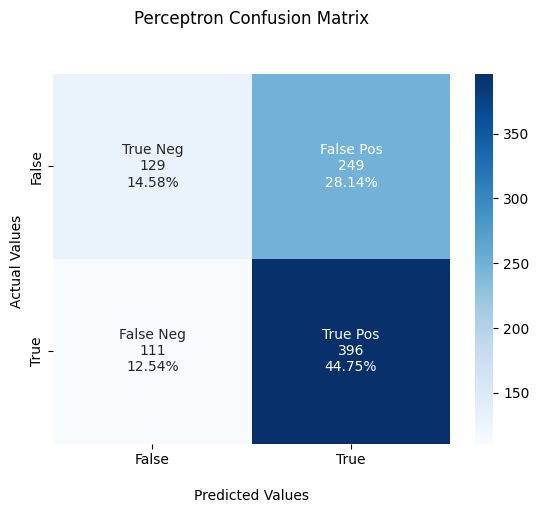

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Perceptron Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
decision_tree_class =  classification_report(y_test, y_pred)
print(decision_tree_class)

              precision    recall  f1-score   support

           0       0.54      0.34      0.42       378
           1       0.61      0.78      0.69       507

    accuracy                           0.59       885
   macro avg       0.58      0.56      0.55       885
weighted avg       0.58      0.59      0.57       885



In [26]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

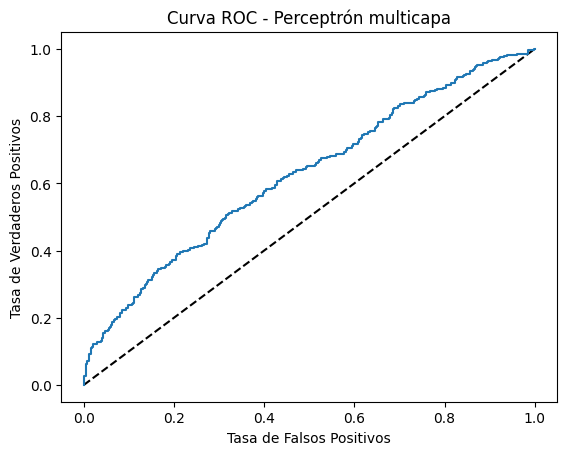

In [27]:
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='decision_tree_class')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Perceptrón multicapa')
plt.show()

In [28]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5932203389830508
------------------------------
precision: 0.6139534883720931
------------------------------
recall:    0.7810650887573964
------------------------------
f1:        0.6875000000000001


In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

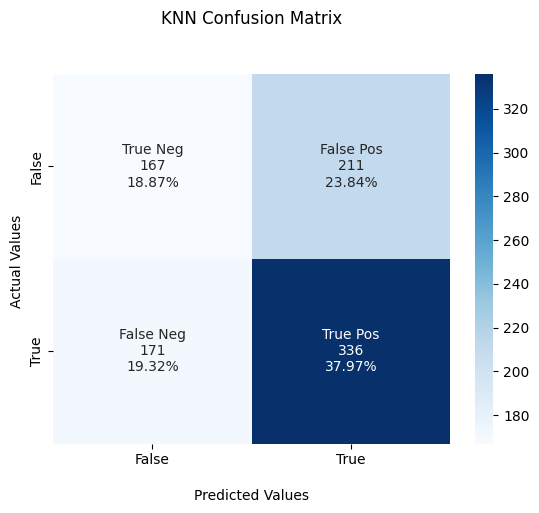

In [30]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('KNN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
KNN = classification_report(y_test, y_pred)
print(KNN)

              precision    recall  f1-score   support

           0       0.49      0.44      0.47       378
           1       0.61      0.66      0.64       507

    accuracy                           0.57       885
   macro avg       0.55      0.55      0.55       885
weighted avg       0.56      0.57      0.56       885



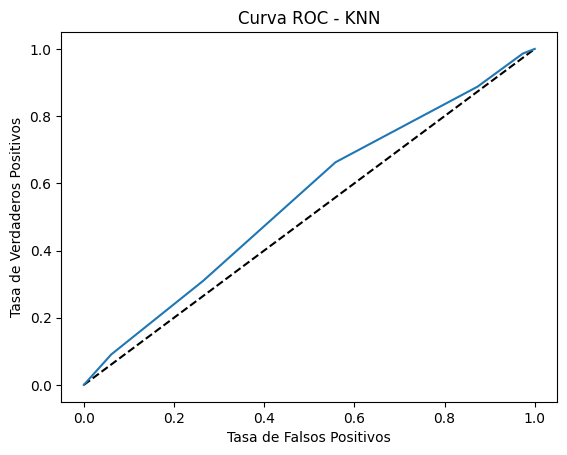

In [32]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.show()

In [33]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5683615819209039
------------------------------
precision: 0.6142595978062158
------------------------------
recall:    0.6627218934911243
------------------------------
f1:        0.6375711574952562


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
y_pred = model.predict(X_test)

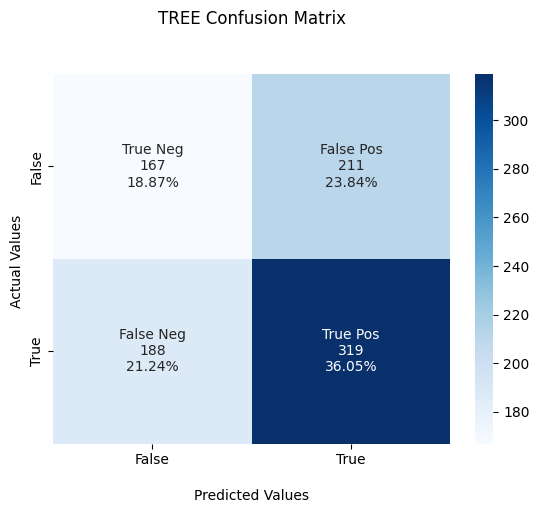

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('TREE Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
TREE = classification_report(y_test, y_pred)
print(TREE)

              precision    recall  f1-score   support

           0       0.47      0.44      0.46       378
           1       0.60      0.63      0.62       507

    accuracy                           0.55       885
   macro avg       0.54      0.54      0.54       885
weighted avg       0.55      0.55      0.55       885



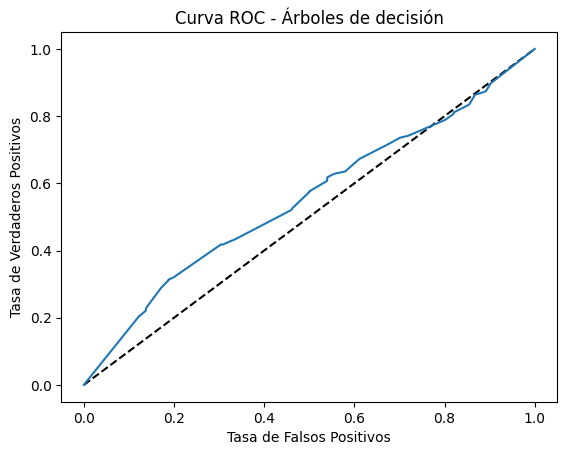

In [38]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Árboles de decisión')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Árboles de decisión')
plt.show()

In [39]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5491525423728814
------------------------------
precision: 0.6018867924528302
------------------------------
recall:    0.6291913214990138
------------------------------
f1:        0.6152362584378013


In [40]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [41]:
y_pred = model.predict(X_test)

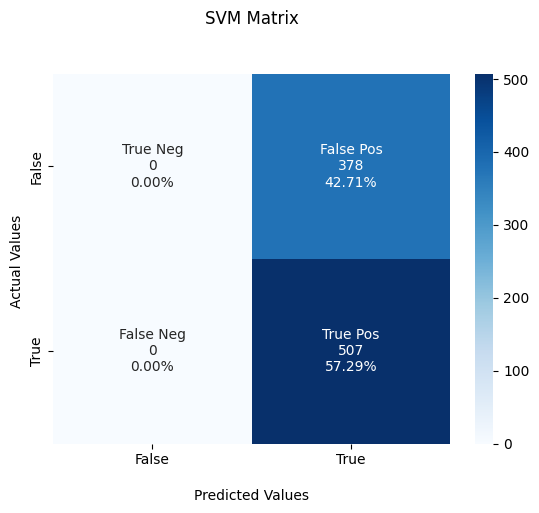

In [42]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('SVM Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [43]:
SVM = classification_report(y_test, y_pred)
print(SVM)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       378
           1       0.57      1.00      0.73       507

    accuracy                           0.57       885
   macro avg       0.29      0.50      0.36       885
weighted avg       0.33      0.57      0.42       885

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

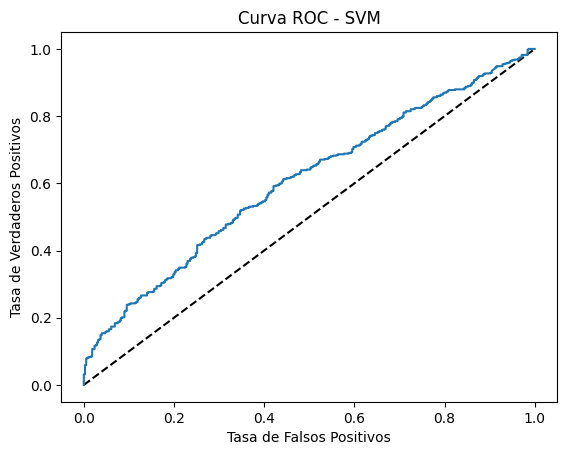

In [44]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM')
plt.show()

In [45]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5728813559322034
------------------------------
precision: 0.5728813559322034
------------------------------
recall:    1.0
------------------------------
f1:        0.7284482758620688


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49f0a3e6-eba7-4bd1-896c-a13c36012a92' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>